In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
# Replace with your file path or mount for Google Colab
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Data Cleaning and Preparation

In [3]:
print("Missing values per column:\n", df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
print("Remaining missing values:\n", df.isnull().sum())

Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Remaining missing values:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


## Statistical Summary

In [4]:
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
summary = summary[['mean', 'std', 'median', 'IQR', 'min', '25%', '50%', '75%', 'max']]
summary

,mean,std,median,IQR,min,25%,50%,75%,max
LB,133.340204,11.214379,133.000000,14.000000,51.842487,126.000000,133.000000,140.000000,214.000000
AC,0.003204,0.004373,0.001634,0.005606,-0.019284,0.000000,0.001634,0.005606,0.038567
FM,0.009894,0.067540,0.000000,0.002567,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,0.004391,0.003340,0.004484,0.004685,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,0.001895,0.003343,0.000000,0.003289,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,0.000002,0.000141,0.000000,0.000000,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,0.000173,0.000836,0.000000,0.000000,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,46.995984,18.813973,49.000000,29.000000,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,1.364378,1.173632,1.200000,1.000000,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,10.285964,21.205041,0.000000,11.000000,-91.000000,0.000000,0.000000,11.000000,182.000000


## Data Visualization - Histograms and Boxplots

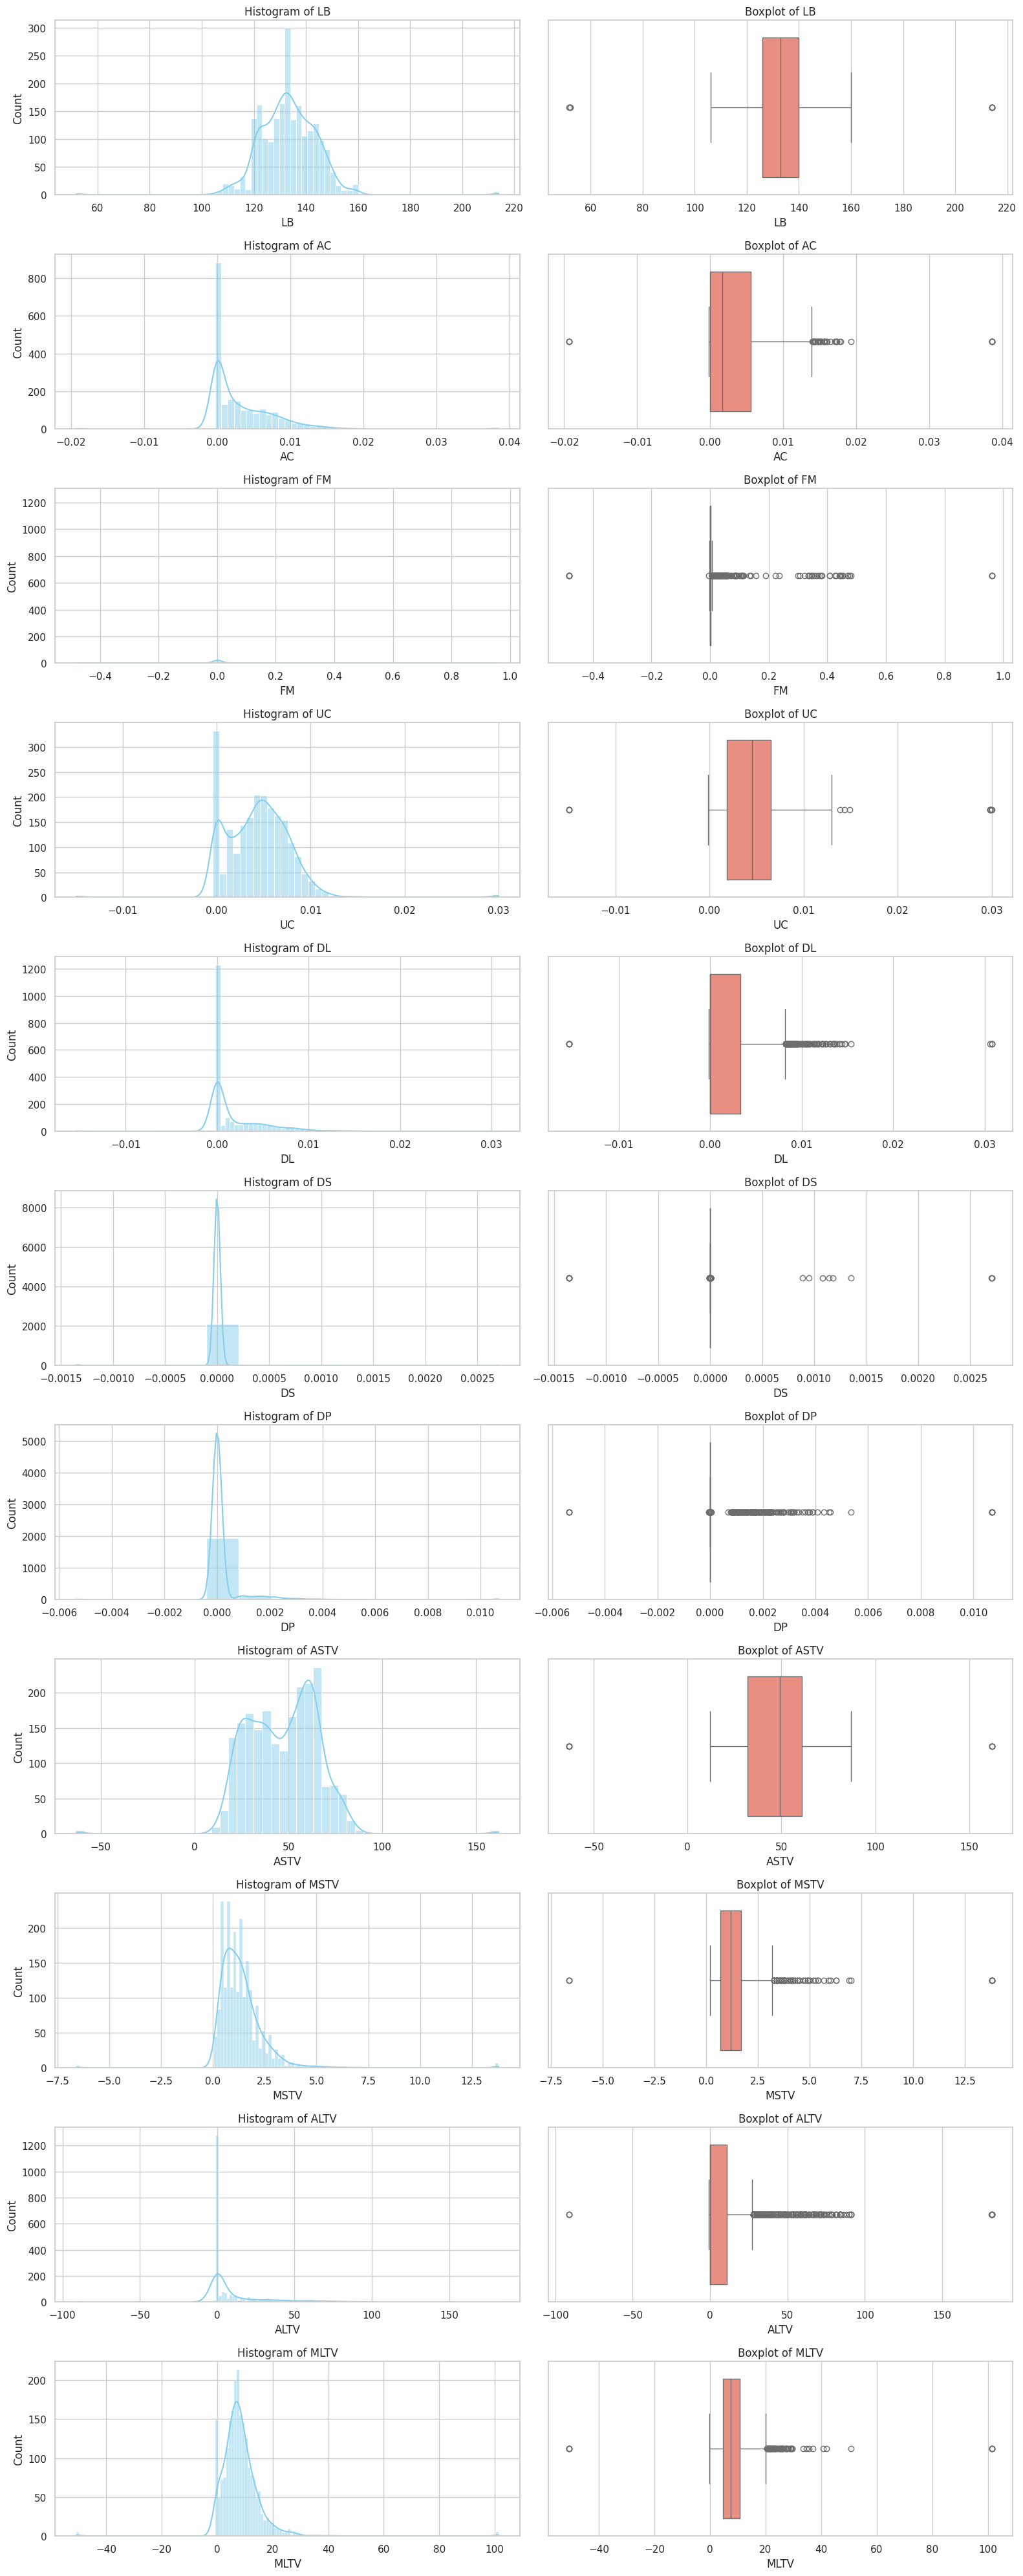

In [5]:
num_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(16, 40))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Correlation Heatmap

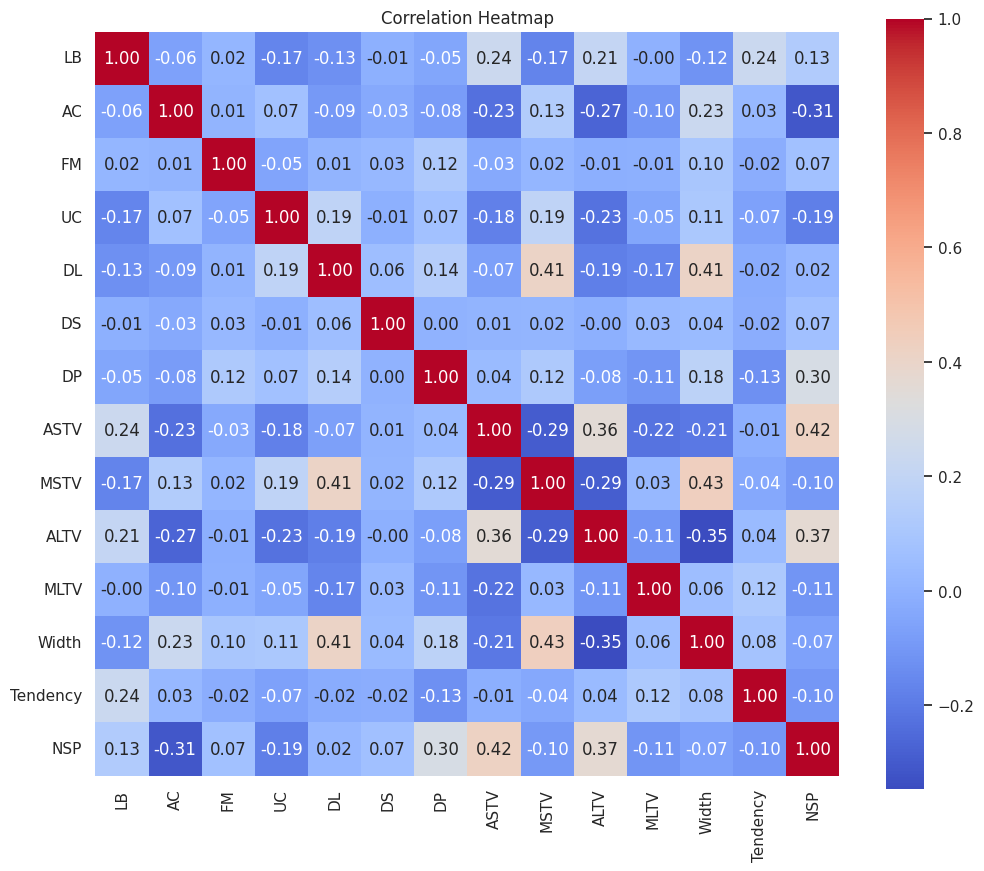

In [6]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

## Top Correlated Feature Pairs

In [7]:
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1].drop_duplicates()
print("Top correlations:\n", high_corr.head(10))

Top correlations:
 MSTV   Width    0.432822
NSP    ASTV     0.420873
MSTV   DL       0.410102
DL     Width    0.408578
ALTV   NSP      0.366454
       ASTV     0.357497
Width  ALTV     0.345732
NSP    AC       0.311689
       DP       0.295057
MSTV   ASTV     0.293882
dtype: float64


## Outlier Detection

In [8]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_astv = detect_outliers_iqr(df, 'ASTV')
print(f"Outliers in ASTV: {len(outliers_astv)}")

Outliers in ASTV: 10


## Categorical Variable - NSP

/tmp/ipython-input-9-2230767175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NSP', data=df, palette='Set2')


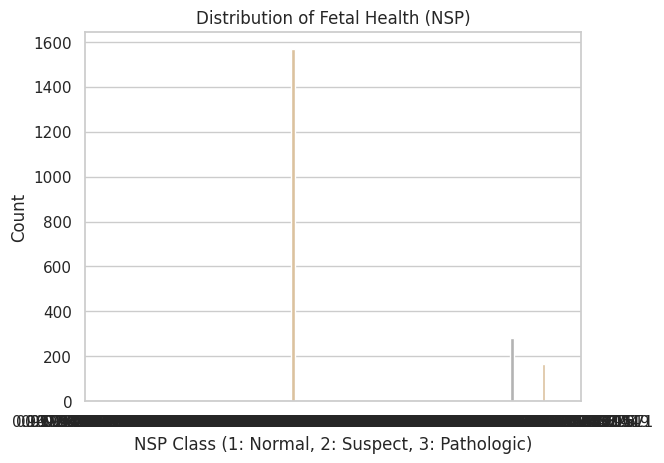

In [9]:
sns.countplot(x='NSP', data=df, palette='Set2')
plt.title('Distribution of Fetal Health (NSP)')
plt.xlabel('NSP Class (1: Normal, 2: Suspect, 3: Pathologic)')
plt.ylabel('Count')
plt.show()

## Violin Plot

/tmp/ipython-input-10-3848630348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y='LB', data=df, palette='Pastel1')


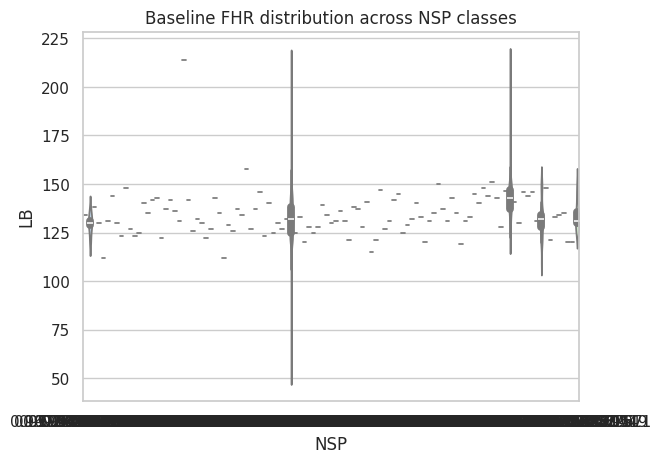

In [10]:
sns.violinplot(x='NSP', y='LB', data=df, palette='Pastel1')
plt.title('Baseline FHR distribution across NSP classes')
plt.show()

## 🔗 Pair Plot for Top Features

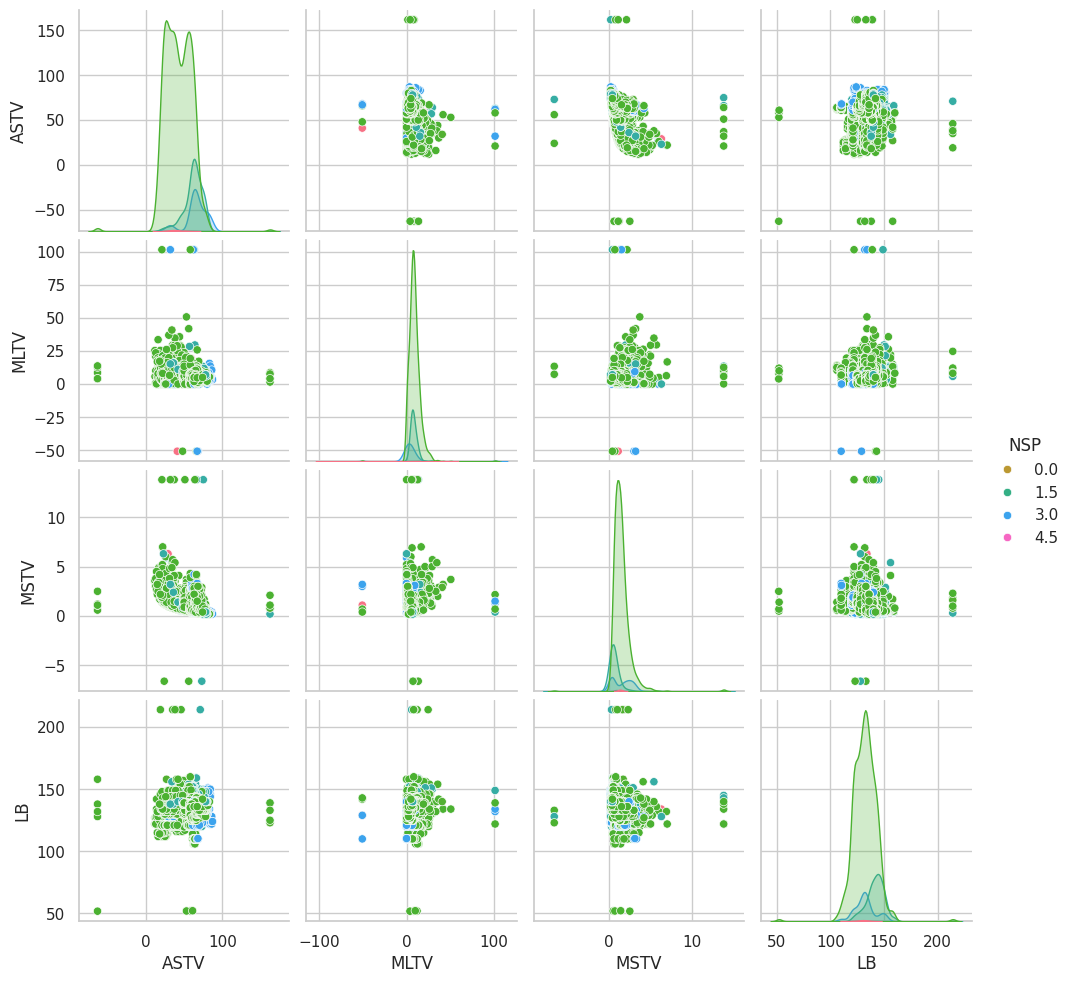

In [11]:
top_features = ['ASTV', 'MLTV', 'MSTV', 'LB', 'NSP']
sns.pairplot(df[top_features], hue='NSP', palette='husl')
plt.show()

## Conclusion

- Missing values were handled using median imputation.
- Strong correlation observed between ASTV and MLTV.
- Outliers exist in several features and may affect modeling.
- NSP distribution is imbalanced with majority in class 1.
- Visualizations show clear trends in variability features across classes.

### Recommendations:
- Handle outliers before model training.
- Address class imbalance for better classification performance.
